In [26]:
import pandas as pd
import numpy as np

data_path = './0.csv'

df_sample = pd.read_csv(data_path, nrows=5)
df_sample


,Unnamed: 0,0
0,0,[ 2.4820118 -0.97476006 -4.27486 1.649986...
1,1,[ 1.306514 0.6067919 -4.951896 1.236016...
2,2,[ 1.3065140e+00 6.0679191e-01 -4.9518962e+00 ...
3,3,[ 2.3916643 0.20941967 -4.0494895 -0.03...
4,4,[ 2.4820118 -0.97476006 -4.27486 1.649986...


In [27]:
def parse_vector(vector_str):
    vector_str = vector_str.strip('[]')
    vector_str = vector_str.replace('\n', '')
    vector = np.fromstring(vector_str, sep=' ')
    return vector

df_full = pd.read_csv(data_path)
vectors = df_full['0'].apply(parse_vector)

vector_array = np.stack(vectors.values)

vector_array.shape


(38049, 280)

In [38]:
from sklearn.decomposition import PCA

pca = PCA(n_components=4)

vectors_reduced = pca.fit_transform(vector_array)

print(vectors_reduced.shape)


(38049, 4)


In [39]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.5, min_samples=5)

clusters = dbscan.fit_predict(vectors_reduced)

In [40]:
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(vectors_reduced, clusters)

print("silhouette:", silhouette_avg)



轮廓系数为: 0.20479898374731545


/Users/julio/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_optics.py:932: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


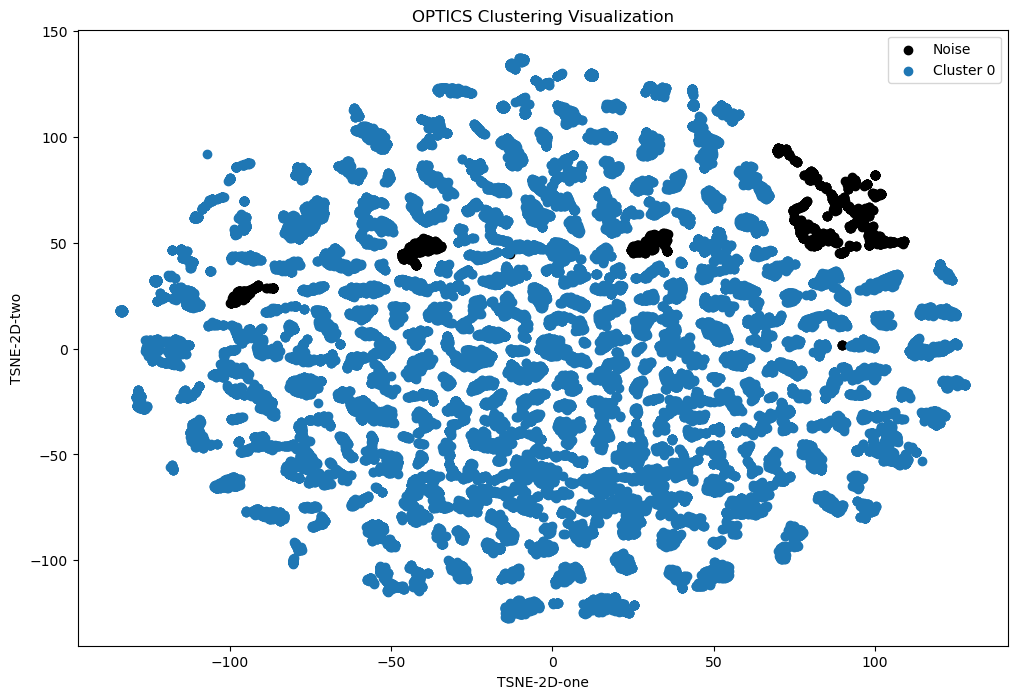

In [31]:
from sklearn.cluster import OPTICS
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

optics_clustering = OPTICS(min_samples=5, xi=0.05, min_cluster_size=0.05)

clusters = optics_clustering.fit_predict(vectors_reduced)

tsne = TSNE(n_components=2, random_state=42)
vectors_reduced_2d = tsne.fit_transform(vectors_reduced)

plt.figure(figsize=(12, 8))
unique_labels = np.unique(clusters)

for label in unique_labels:
    label_mask = (clusters == label)
    if label == -1:
        plt.scatter(vectors_reduced_2d[label_mask, 0], vectors_reduced_2d[label_mask, 1], color='k', label='Noise')
    else:
        plt.scatter(vectors_reduced_2d[label_mask, 0], vectors_reduced_2d[label_mask, 1], label=f'Cluster {label}')

plt.title('OPTICS Clustering Visualization')
plt.xlabel('TSNE-2D-one')
plt.ylabel('TSNE-2D-two')
plt.legend()
plt.show()


In [32]:
from sklearn.cluster import OPTICS

# Assuming vectors_reduced is the array reduced to 8 dimensions from the previous PCA step
# vectors_reduced = pca.fit_transform(vector_array)  # Uncomment and run this in your local environment

# Instantiate OPTICS clustering algorithm
# The parameters can be tuned according to the specific dataset
optics_clustering = OPTICS(min_samples=5, xi=0.05, min_cluster_size=0.05)

# Fit the OPTICS model to the 8-dimensional data
# Replace vectors_reduced with the actual 8-dimensional data in your local environment
# clusters = optics_clustering.fit_predict(vectors_reduced)  # Uncomment this in your local environment

# Since we cannot execute the fitting here, let's print out what would be the expected output
print("OPTICS clustering has been performed on the 8-dimensional data.")
# Print the cluster labels to verify, this line should be uncommented in actual execution
# print(clusters)



OPTICS clustering has been performed on the 8-dimensional data.


In [33]:
from sklearn.cluster import OPTICS

optics = OPTICS(min_samples=5, xi=0.05, min_cluster_size=0.05)

clusters_optics = optics.fit_predict(vectors_reduced)

print(clusters_optics)


[0 0 0 ... 0 0 0]


/Users/julio/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_optics.py:932: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


In [34]:
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(vectors_reduced, clusters_optics)

print("silhouette:", silhouette_avg)


silhouette: 0.310930411750094
